### Dataset

**Dataset yang digunakan untuk klasterisasi adalah data emisi karbondioksida (CO2) dari kendaraan bermotor**
(src: [dataset](https://www.kaggle.com/debajyotipodder/co2-emission-by-vehicles)).

- Terdapat 12 jumlah atribut
- Banyaknya data: n=7385


### Workflow

In [33]:
#preinstall sklearn_extra
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 3.2 MB/s 
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [34]:
#import packages
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors

In [3]:
#read data 
df_raw = pd.read_csv('co2_emission.csv')
df_raw.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


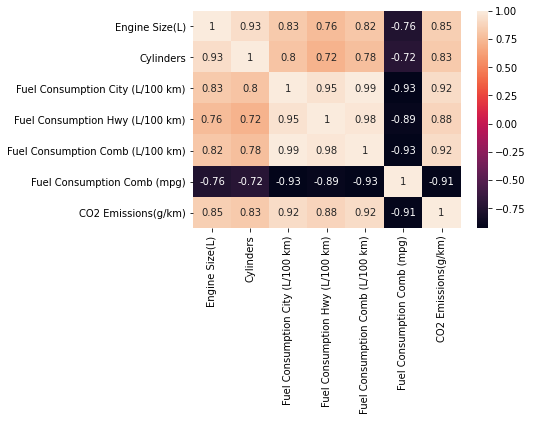

In [6]:
#heatmap dan matrix korelasi
sns.heatmap(df_raw.corr(), annot=True)
plt.show()

**Dari korelasi matrix diatas, akan diambil dua buat atribut untuk digunakan sebagai parameter penetuan klaster: Engine Size & CO2 Emission**

In [9]:
#labeling ulang penamaan atribut
df_raw.columns = ['brand','model','vechile_class','engine_size', 'cylinders', 'transmission', 'fuel_type',
             'fuel_consump_city', 'fuel_consump_highway', 'fuel_consump_combine', 'fuel_consump_comb_mpg', 'co2_emission']
df_raw.head()

,brand,model,vechile_class,engine_size,cylinders,transmission,fuel_type,fuel_consump_city,fuel_consump_highway,fuel_consump_combine,fuel_consump_comb_mpg,co2_emission
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [45]:
#pemecahan data untuk mengambil dua atribut utama: engine_size & co2_emission
df = df_raw[['engine_size', 'co2_emission']]
df

,engine_size,co2_emission
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
...,...,...
7380,2.0,219
7381,2.0,232
7382,2.0,240
7383,2.0,232


In [46]:
#menerapkan standard scaling sehingga nilai berada pada range 0-1
scaler = MinMaxScaler()
scaled_df = df.copy()
scaled_df = scaler.fit_transform(scaled_df)
scaled_df

array([[0.14666667, 0.23474178],
       [0.2       , 0.29342723],
       [0.08      , 0.09389671],
       ...,
       [0.14666667, 0.33802817],
       [0.14666667, 0.31924883],
       [0.14666667, 0.35680751]])

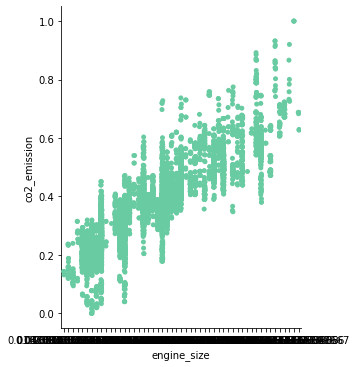

In [47]:
df_plot = pd.DataFrame(scaled_df, columns=['engine_size', 'co2_emission'])
sns.catplot(data=df_plot, x='engine_size', y='co2_emission', color='#69cba1')

###K-Means

In [48]:
#model
kmeans = KMeans(n_clusters=4).fit(scaled_df)
df_kmeans = df_plot.copy()
df_kmeans['klaster'] = kmeans.labels_
df_kmeans.head()

,engine_size,co2_emission,klaster
0,0.146667,0.234742,1
1,0.200000,0.293427,1
2,0.080000,0.093897,1
3,0.346667,0.373239,2
4,0.346667,0.347418,2


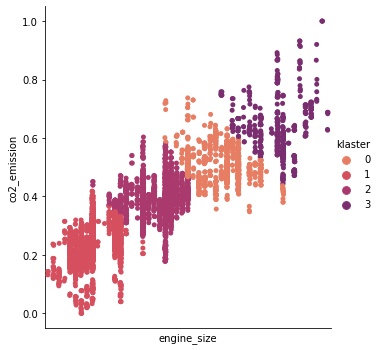

In [49]:
#plot kmeans
sns.catplot(data=df_kmeans, x='engine_size', y='co2_emission', palette='flare', hue='klaster').set(xticks=[])
plt.show()

###KMedoids

In [53]:
kmedoids = KMedoids(n_clusters=4).fit(scaled_df)
df_kmed = df_plot.copy()
df_kmed['cluster'] = kmedoids.labels_
df_kmed.head()

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)
/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  "its corresponding cluster ({k}).".format(k=k)
/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  "its corresponding cluster ({k}).".format(k=k)


,engine_size,co2_emission,cluster
0,0.146667,0.234742,0
1,0.200000,0.293427,0
2,0.080000,0.093897,0
3,0.346667,0.373239,0
4,0.346667,0.347418,0


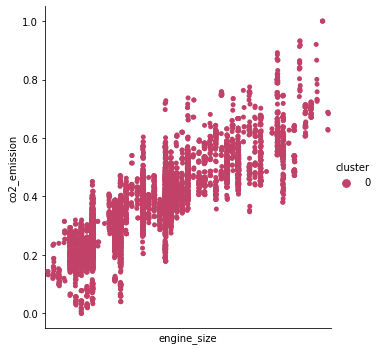

In [54]:
#plot kmedoids
sns.catplot(data=df_kmed, x='engine_size', y='co2_emission', palette='flare', hue='cluster').set(xticks=[])
plt.show()

###Hierarchy

###DBScan
